## 获取训练集数据

In [1]:
import torch
import numpy as np
import pandas as pd
from d2l import torch as d2l
from torch import nn
from PIL import Image
import cv2
import matplotlib.pyplot as plt
from torch.nn import functional as F

In [2]:
prePath = '../data/classify-leaves/'

In [3]:
train_dataframe = pd.read_csv(prePath + 'train.csv')

In [4]:
train_dataframe

,image,label
0,images/0.jpg,maclura_pomifera
1,images/1.jpg,maclura_pomifera
2,images/2.jpg,maclura_pomifera
3,images/3.jpg,maclura_pomifera
4,images/4.jpg,maclura_pomifera
...,...,...
18348,images/18348.jpg,aesculus_glabra
18349,images/18349.jpg,liquidambar_styraciflua
18350,images/18350.jpg,cedrus_libani
18351,images/18351.jpg,prunus_pensylvanica


In [5]:
train_np = train_dataframe.to_numpy()

In [6]:
train_np

array([['images/0.jpg', 'maclura_pomifera'],
       ['images/1.jpg', 'maclura_pomifera'],
       ['images/2.jpg', 'maclura_pomifera'],
       ...,
       ['images/18350.jpg', 'cedrus_libani'],
       ['images/18351.jpg', 'prunus_pensylvanica'],
       ['images/18352.jpg', 'quercus_montana']], dtype=object)

In [7]:
type(train_np)
train_np.shape
len(train_np)

18353

In [8]:
train_features = np.ones((len(train_np), 224, 224, 3))
train_labels = []

In [6]:
train_labels = []

In [9]:
train_features.shape

(18353, 224, 224, 3)

In [10]:
for i in range(len(train_np)):
    img_cv2 = cv2.imread(prePath + train_np[i][0], cv2.IMREAD_COLOR)
    train_features[i, :] = img_cv2
    train_labels.append(train_np[i][1])

In [11]:
print(len(train_features))
print(len(train_labels))

18353
18353


In [12]:
print(len(train_labels))

18353


In [13]:
type(train_features[0])

numpy.ndarray

In [14]:
train_features = torch.Tensor(train_features)

In [15]:
train_features = torch.transpose(train_features, 1, 3)

In [16]:
type(train_features)

train_features = train_features.to(torch.float32)
train_features.dtype

torch.float32

In [17]:
train_labels

['maclura_pomifera',
 'maclura_pomifera',
 'maclura_pomifera',
 'maclura_pomifera',
 'maclura_pomifera',
 'maclura_pomifera',
 'ulmus_rubra',
 'broussonettia_papyrifera',
 'maclura_pomifera',
 'broussonettia_papyrifera',
 'maclura_pomifera',
 'prunus_virginiana',
 'maclura_pomifera',
 'prunus_virginiana',
 'broussonettia_papyrifera',
 'maclura_pomifera',
 'maclura_pomifera',
 'broussonettia_papyrifera',
 'maclura_pomifera',
 'ulmus_rubra',
 'maclura_pomifera',
 'maclura_pomifera',
 'prunus_virginiana',
 'broussonettia_papyrifera',
 'maclura_pomifera',
 'broussonettia_papyrifera',
 'ulmus_rubra',
 'prunus_virginiana',
 'maclura_pomifera',
 'ulmus_rubra',
 'prunus_virginiana',
 'acer_rubrum',
 'broussonettia_papyrifera',
 'maclura_pomifera',
 'cryptomeria_japonica',
 'maclura_pomifera',
 'maclura_pomifera',
 'acer_rubrum',
 'maclura_pomifera',
 'acer_rubrum',
 'ulmus_rubra',
 'maclura_pomifera',
 'acer_rubrum',
 'acer_rubrum',
 'cryptomeria_japonica',
 'acer_rubrum',
 'broussonettia_papy

In [18]:
list_labels = []
[list_labels.append(x) for x in train_labels if x not in list_labels]
print(len(list_labels))
print(list_labels)

176
['maclura_pomifera', 'ulmus_rubra', 'broussonettia_papyrifera', 'prunus_virginiana', 'acer_rubrum', 'cryptomeria_japonica', 'staphylea_trifolia', 'asimina_triloba', 'diospyros_virginiana', 'tilia_cordata', 'ulmus_pumila', 'quercus_muehlenbergii', 'juglans_cinerea', 'cercis_canadensis', 'ptelea_trifoliata', 'acer_palmatum', 'catalpa_speciosa', 'abies_concolor', 'eucommia_ulmoides', 'quercus_montana', 'koelreuteria_paniculata', 'liriodendron_tulipifera', 'styrax_japonica', 'malus_pumila', 'prunus_sargentii', 'cornus_mas', 'magnolia_virginiana', 'ostrya_virginiana', 'magnolia_acuminata', 'ilex_opaca', 'acer_negundo', 'fraxinus_nigra', 'pyrus_calleryana', 'picea_abies', 'chionanthus_virginicus', 'carpinus_caroliniana', 'zelkova_serrata', 'aesculus_pavi', 'taxodium_distichum', 'carya_tomentosa', 'picea_pungens', 'carya_glabra', 'quercus_macrocarpa', 'carya_cordiformis', 'catalpa_bignonioides', 'tsuga_canadensis', 'populus_tremuloides', 'magnolia_denudata', 'crataegus_viridis', 'populus_

In [19]:
print(list_labels[0])

maclura_pomifera


In [20]:
def get_img_labels_index(labels):
    """返回图片数据集的文本标签"""
    text_labels = list_labels
    indexs = []
    for label in labels:
        for i, s_label in enumerate(text_labels):
            if label == s_label:
                indexs.append(i)
    return indexs

In [21]:
train_labels_index = get_img_labels_index(train_labels)
train_labels_index
len(train_labels_index)

18353

In [22]:
train_labels = torch.Tensor(train_labels_index)
train_labels = train_labels.to(torch.long)
train_labels.dtype

torch.int64

In [23]:
batch_size = 64
data_iter = d2l.load_array((train_features, train_labels), batch_size)

In [24]:
for X, y in data_iter:
    print(X.shape)
    print(X.dtype)
    print(y.shape)
    print(y.dtype)
    break

torch.Size([64, 3, 224, 224])
torch.float32
torch.Size([64])
torch.int64


In [25]:
class Residual(nn.Module): 
    def __init__(self, input_channels, num_channels,
                 use_1x1conv=False, strides=1):
        super().__init__()
        self.conv1 = nn.Conv2d(input_channels, num_channels,
                               kernel_size=3, padding=1, stride=strides)
        self.conv2 = nn.Conv2d(num_channels, num_channels,
                               kernel_size=3, padding=1)
        if use_1x1conv:
            self.conv3 = nn.Conv2d(input_channels, num_channels,
                                   kernel_size=1, stride=strides)
        else:
            self.conv3 = None
        self.bn1 = nn.BatchNorm2d(num_channels)
        self.bn2 = nn.BatchNorm2d(num_channels)

    def forward(self, X):
        Y = F.relu(self.bn1(self.conv1(X)))
        Y = self.bn2(self.conv2(Y))
        if self.conv3:
            X = self.conv3(X)
        Y += X
        return F.relu(Y)

def resnet_block(input_channels, num_channels, num_residuals,
                 first_block=False):
    blk = []
    for i in range(num_residuals):
        if i == 0 and not first_block:
            blk.append(Residual(input_channels, num_channels,
                                use_1x1conv=True, strides=2))
        else:
            blk.append(Residual(num_channels, num_channels))
    return blk

In [26]:
b1 = nn.Sequential(nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3),
                   nn.BatchNorm2d(64), nn.ReLU(),
                   nn.MaxPool2d(kernel_size=3, stride=2, padding=1))
b2 = nn.Sequential(*resnet_block(64, 64, 2, first_block=True))
b3 = nn.Sequential(*resnet_block(64, 128, 2))
b4 = nn.Sequential(*resnet_block(128, 256, 2))
b5 = nn.Sequential(*resnet_block(256, 512, 2))
net = nn.Sequential(b1, b2, b3, b4, b5,
                    nn.AdaptiveAvgPool2d((1,1)),
                    nn.Flatten(), nn.Linear(512, 176))

In [27]:
X = torch.rand(size=(1, 3, 224, 224))
for layer in net:
    layer = layer.to(d2l.try_gpu())
    X = X.to(d2l.try_gpu())
    X = layer(X)
    print(layer.__class__.__name__,'output shape:\t', X.shape)

Sequential output shape:	 torch.Size([1, 64, 56, 56])
Sequential output shape:	 torch.Size([1, 64, 56, 56])
Sequential output shape:	 torch.Size([1, 128, 28, 28])
Sequential output shape:	 torch.Size([1, 256, 14, 14])
Sequential output shape:	 torch.Size([1, 512, 7, 7])
AdaptiveAvgPool2d output shape:	 torch.Size([1, 512, 1, 1])
Flatten output shape:	 torch.Size([1, 512])
Linear output shape:	 torch.Size([1, 176])


loss 0.036, train acc 0.988, test acc 0.966
143.0 examples/sec on cuda:0


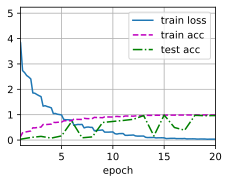

In [28]:
lr, num_epochs = 0.1, 20
# train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=96)
d2l.train_ch6(net, data_iter, data_iter, num_epochs, lr, d2l.try_gpu())

## 预测

In [29]:
# 保存模型
torch.save(net.state_dict(), './kaggle_img.params')

In [12]:
# 加载模型
net.load_state_dict(torch.load('./kaggle_img.params'))
net.eval()

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (1): Sequential(
    (0): Residual(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): Residual(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (bn2): BatchNorm2d(64, eps=1e-

In [49]:
print(next(net.parameters()).device)

cuda:0


In [50]:
net = net.cpu()#将模型转移到cpu上

In [51]:
print(next(net.parameters()).device)  # 输出：cuda:0

cpu


In [16]:
# cuda 测试
X = torch.rand(size=(1, 3, 224, 224))
for layer in net:
    layer = layer.to(d2l.try_gpu())
    X = X.to(d2l.try_gpu())
    X = layer(X)
    print(layer.__class__.__name__,'output shape:\t', X.shape)

Sequential output shape:	 torch.Size([1, 64, 56, 56])
Sequential output shape:	 torch.Size([1, 64, 56, 56])
Sequential output shape:	 torch.Size([1, 128, 28, 28])
Sequential output shape:	 torch.Size([1, 256, 14, 14])
Sequential output shape:	 torch.Size([1, 512, 7, 7])
AdaptiveAvgPool2d output shape:	 torch.Size([1, 512, 1, 1])
Flatten output shape:	 torch.Size([1, 512])
Linear output shape:	 torch.Size([1, 176])


In [21]:
# cpu 测试
X = torch.rand(size=(1, 3, 224, 224))
for layer in net:
    layer = layer
    X = X
    X = layer(X)
    print(layer.__class__.__name__,'output shape:\t', X.shape)

Sequential output shape:	 torch.Size([1, 64, 56, 56])
Sequential output shape:	 torch.Size([1, 64, 56, 56])
Sequential output shape:	 torch.Size([1, 128, 28, 28])
Sequential output shape:	 torch.Size([1, 256, 14, 14])
Sequential output shape:	 torch.Size([1, 512, 7, 7])
AdaptiveAvgPool2d output shape:	 torch.Size([1, 512, 1, 1])
Flatten output shape:	 torch.Size([1, 512])
Linear output shape:	 torch.Size([1, 176])


In [30]:
test_dataframe = pd.read_csv(prePath + 'test.csv')

In [31]:
test_dataframe

,image
0,images/18353.jpg
1,images/18354.jpg
2,images/18355.jpg
3,images/18356.jpg
4,images/18357.jpg
...,...
8795,images/27148.jpg
8796,images/27149.jpg
8797,images/27150.jpg
8798,images/27151.jpg


In [32]:
test_np = test_dataframe.to_numpy()

In [33]:
test_np

array([['images/18353.jpg'],
       ['images/18354.jpg'],
       ['images/18355.jpg'],
       ...,
       ['images/27150.jpg'],
       ['images/27151.jpg'],
       ['images/27152.jpg']], dtype=object)

In [34]:
test_features = np.ones((len(test_np), 224, 224, 3))

In [35]:
for i in range(len(test_np)):
    img_cv2 = cv2.imread(prePath + test_np[i][0], cv2.IMREAD_COLOR)
    test_features[i, :] = img_cv2

In [36]:
test_features = torch.Tensor(test_features)
test_features = torch.transpose(test_features, 1, 3)

In [43]:
test_features.shape

torch.Size([8800, 3, 224, 224])

In [37]:
list_labels[0]

'maclura_pomifera'

In [39]:
# 保存最后预测的标签
pred_label = []

In [38]:
# 预测的batch_size为100  不拿全部的数据进行预测
def getPredData(i):
    # i 表示第几个100的数据，最小为1，最大为88，总数为8800
    return test_features[(i - 1) * 100:i * 100, :]

In [48]:
def train_and_pred(test_features_batch):
    # 将网络应用于测试集。
    preds = net(test_features_batch).argmax(axis=1)
    preds = preds.numpy()
    
    for i in range(len(preds)):
        pred_label.append(list_labels[preds[i]])

In [52]:
# 开始预测
for i in range(88):
    test_features_batch = getPredData(i + 1)
    train_and_pred(test_features_batch)

In [55]:
pred_label
len(pred_label)
test_dataframe['label'] = pred_label
test_dataframe.to_csv('submission_2.csv', index=False)